In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Burguer's equation

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x}=0$$

is often used as a first step into hydrodynamics. It is almost identical to the advection equation treated before, but this time the wave speed is NOT a constant $v$ but is given by the filed $u$ itself. This fact may lead to shicks, which are typical in hydrodynamics situations.


### 1.

User Burguuer's equation to evolve a sin profile 

$$\Psi_{o} = \Psi(x,t=0)=\frac{1}{8}\sin\left(\frac{2\pi x}{L}\right)$$

in a [0,L] domain with L = 100. Use "outflow" boundary conditions

Implement the upwind scheme and demostrate by experiment that the solution to Burguer's equation forms a shock after $t \geq 140$ time has pased. Remeber that upwind means "in the directio oposite of the velocity".




As a first step we plot the initial profile of $\Psi$ function

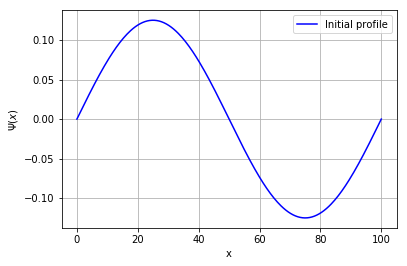

In [2]:
L = 100

def phi(x):
    return 1./8*np.sin(2*np.pi*x/L)

x = np.linspace(0,L,256)

plt.plot(x,phi(x),"b-",label = "Initial profile")
plt.xlabel("x")
plt.ylabel("$\Psi(x)$")
plt.grid(True)
plt.legend()

Consider a Euler step in the time and upwind first order scheme in the space in the following form

$$\frac{\partial u}{\partial t}=-u\frac{\partial u}{\partial x}$$

then

$$
\left[u\frac{\partial u}{\partial x}\right]_{i} = \left\{
        \begin{array}{ll}
            u_{i}\frac{u_{i}-u_{i-1}}{x_{i}-x_{i-1}} & \quad u_{i} \geq 0 \\
            u_{i}\frac{u_{i+1}-u_{i}}{x_{i+1}-x_{i}} & \quad u_{i} \leq 0 \\ 
        \end{array}
    \right.
$$

For this reason we have two way to discretize the evolve equation

#### $u_{i} > 0$

$$u_{i}^{n+1} = u_{i}^{n}-\frac{\Delta t}{x_{i}-x_{i-1}}u_{i}^{n}(u_{i}^{n}-u_{i-1}^{n})$$

#### $u_{i} < 0$

$$u_{i}^{n+1} = u_{i}^{n}-\frac{\Delta t}{x_{i}-x_{i-1}}u_{i}^{n}(u_{i+1}^{n}-u_{i}^{n})$$






In [50]:
n=256
L = 100
x = np.linspace(0,L,n)
u = phi(x)
def Burguers(u,dt,t):
    for j in range(t):
        u[0] = u[1]
        for i in range(1,n-1):
            if u[i] > 0:
                u[i] = u[i] - dt*u[i]*(u[i]-u[i-1])/(x[i]-x[i-1])
            else:
                u[i] = u[i] - dt*u[i]*(u[i+1]-u[i])/(x[i+1]-x[i])
        u[-1]=u[-2]
    return u

Text(0.5,1,'Profile evolution')

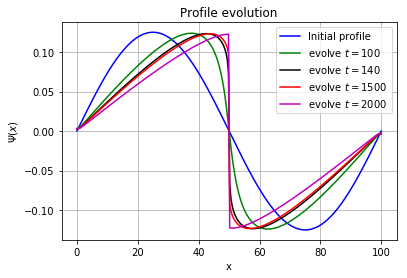

In [51]:
u = phi(x)
plt.plot(x,phi(x),"b-",label = "Initial profile")
plt.plot(x,Burguers(u,0.1,1000),"g-",label = "evolve $t = 100$")
u = phi(x)
plt.plot(x,Burguers(u,0.1,1400),"k-",label = "evolve $t = 140$")
u = phi(x)
plt.plot(x,Burguers(u,0.1,1500),"r-",label = "evolve $t = 1500$")
u = phi(x)
plt.plot(x,Burguers(u,0.1,2000),"m-",label = "evolve $t = 2000$")

plt.xlabel("x")
plt.ylabel("$\Psi(x)$")
plt.grid(True)
plt.legend()
plt.title("Profile evolution")

### 2.

User Burger's equatio to evolve a step profile

$$
\phi(x,t=0) = \left\{
        \begin{array}{ll}
            1 & \quad x > 0.5 \\
            2 & \quad x < 0.5 \\ 
        \end{array}
    \right.
$$

In the domain [0,1]. IMplement the upwind shecme and demostrate by experiment that the solution to Burger's equation presents rarefaction


We plot the initial profile.

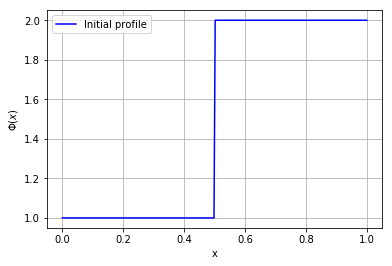

In [75]:
x = np.linspace(0,1,256)
def Phi(x):
    up = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<0.5:
            up[i] = 1
        else:
            up[i] = 2
    return up

u = Phi(x)
plt.plot(x,u,"b-",label = "Initial profile")
plt.xlabel("x")
plt.ylabel("$\Phi(x)$")
plt.grid(True)
plt.legend()


Text(0.5,1,'Profile evolution')

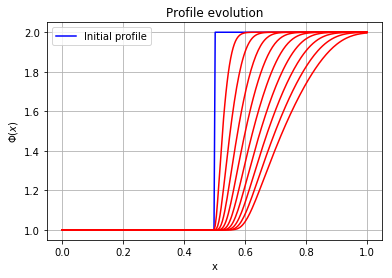

In [99]:
u = Phi(x)
plt.plot(x,u,"b-",label = "Initial profile")

for i in range(1,10):
    u = Phi(x)
    plt.plot(x,Burguers(u,0.001,10*i),"r-")
plt.xlabel("x")
plt.ylabel("$\Phi(x)$")
plt.grid(True)
plt.legend()
plt.title("Profile evolution")

In [57]:
np.heaviside(x,0.5)

array([0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1.